<a href="https://colab.research.google.com/github/mmishra1092/Bike-Sharing-Demand-Prediction/blob/main/MAYANK_MISHRA_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Loading Dataset and Importing packages

In [587]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import datetime as dt
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [588]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [589]:
# upload Data Path
working_path = '/content/drive/MyDrive/Module: 4/Week_3/Capstone Project: Supervised ML: Regression/SeoulBikeData.csv'

In [590]:
# Read data
bike_data_df = pd.read_csv(working_path, encoding = 'ISO-8859-1', low_memory = False)

# Dataset Information and summary

In [591]:
# View first 5 rows of dataset
bike_data_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [592]:
# View last 5 rows of dataset
bike_data_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [593]:
# Dataset information summary
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [594]:
# Datset Unique Value
bike_data_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [595]:
# checking datset summary and features value
bike_data_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Dataset Preprocessing**

In [596]:
# check Duplicate
len(bike_data_df[bike_data_df.duplicated()])

0

There are no duplicate values in our dataset.

In [597]:
# Check null values
bike_data_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no null values in our dataset.

In [598]:
# Columns Names
bike_data_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Features Explanation and it's Data Type
*   **rented_bike_count:** This is Dependent variable and shows number of bike count per hour. Dtype is str and we convert it into datetime format.
*  **date**: Date range in the dataset is from 01/12/2017 to 30/11/2018. Dtype is str and we convert it into datetime format.
*  **hour**: In dataset hour is in digital time format. Dtype is int and we convert it into category type.
*   **seasons**: This shows four seasons present in dataset. Dtype is str.
*   **temperature**: Temperature is in celcius. Dtype is float.
*   **snowfall**: It shows amount of snowfall in cm. Dtype is float.
*   **rainfall**: It shows amount of rainfall in mm. Dtype is float.
*   **windspeed**: It shows speed of wind in m/s. Dtype is float.
*   **solar_radiation**: It shows solar radiation intensity. Dtype is float.
*   **dew_point_temp**: It tells about the temperature in the beginning of the day. Dype is float.
*   **visibility**: Is given in m. Dtype is int.
*   **humidity**: It shows humid present in air in %. Dtype is int.
*   **holiday**: It tells if its during holiday. Dtype is str.
*   **functioning_day**: It tells if the day is functioning or not. Dtype is str.

In [599]:
# Rename columns names
bike_data_df= bike_data_df.rename(columns={'Rented Bike Count':'rented_bike_count','Temperature(°C)':'temperature',
                                           'Humidity(%)':'humidity','Wind speed (m/s)':'wind_speed',
                                           'Visibility (10m)':'visibility','Dew point temperature(°C)':'dew_point_temp',
                                           'Solar Radiation (MJ/m2)':'solar_radiation','Rainfall(mm)':'rainfall',
                                           'Snowfall (cm)':'snowfall','Seasons':'seasons','Holiday':'holiday',
                                           'Functioning Day':'functioning_day','Hour':'hour'})

* Some column names in our dataset are in a format which python do not process 
and so we need to change the column names into relevant format for the smooth operation.

In [600]:
# Breaking date column
bike_data_df['Date'] = bike_data_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [601]:
bike_data_df['year'] = bike_data_df['Date'].dt.year
bike_data_df['month'] = bike_data_df['Date'].dt.month
bike_data_df['day'] = bike_data_df['Date'].dt.day_name()

Python read "Date" column as a object type. So we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day' as a category data type.

In [602]:
# Create a new column weekdays_weekend
bike_data_df['weekdays_weekend']=bike_data_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

For our relevance we need if a day is weekend or weekday, so we create a new column and we need to change the type from integer to category type.

In [603]:
# Number of weekdays and weekend
bike_data_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

It gives number of weekdays which is 6264 and number of weekend which is 2496.

In [604]:
#Drop 'Date','Day', and 'year' column
bike_data_df = bike_data_df.drop(columns=['Date','day','year'],axis=1)

In our dataset we have data of only one year, So we drop it.

In [605]:
# Check top 5 rows after preprocessing
bike_data_df.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [606]:
# Check last 5 rows after preprocessing
bike_data_df.tail()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekdays_weekend
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8759,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


In [607]:
# Data information after creating and dropping some columns
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8760 non-null   int64  
 1   hour               8760 non-null   int64  
 2   temperature        8760 non-null   float64
 3   humidity           8760 non-null   int64  
 4   wind_speed         8760 non-null   float64
 5   visibility         8760 non-null   int64  
 6   dew_point_temp     8760 non-null   float64
 7   solar_radiation    8760 non-null   float64
 8   rainfall           8760 non-null   float64
 9   snowfall           8760 non-null   float64
 10  seasons            8760 non-null   object 
 11  holiday            8760 non-null   object 
 12  functioning_day    8760 non-null   object 
 13  month              8760 non-null   int64  
 14  weekdays_weekend   8760 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 1.0+ MB


In [608]:
# Change numerical coloumn into categorical column
col_names = ['hour','month','weekdays_weekend']
for columns in col_names:
  bike_data_df[columns]= bike_data_df[columns].astype('category')

In [609]:
# Column names after we created weekdays_weekend column.
bike_data_df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

# Exploratory Data Analysis
  *Analysing Numerical Variables*

In [610]:
# Assigning numerical columns to variables
numeric_columns = list(bike_data_df.select_dtypes(['int64','float64']).columns)
numeric_features = pd.Index(numeric_columns)
numeric_features

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

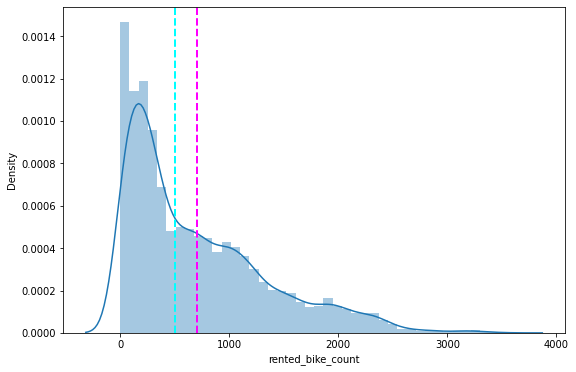

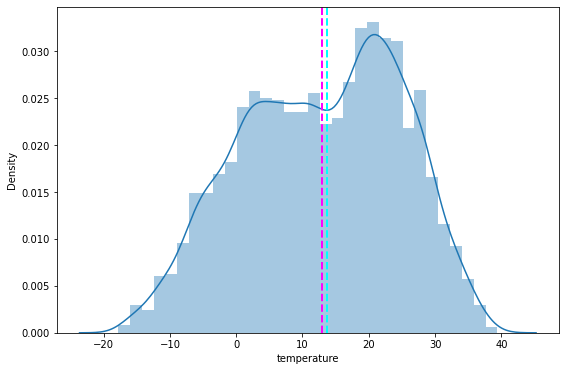

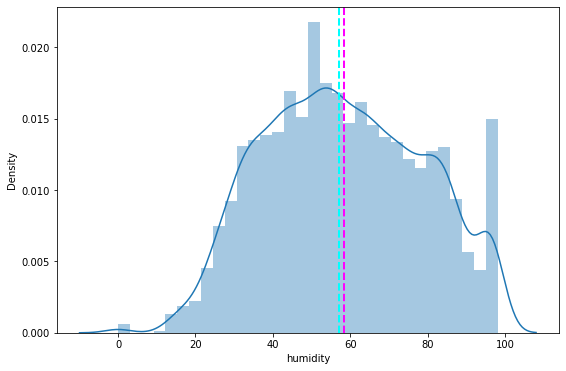

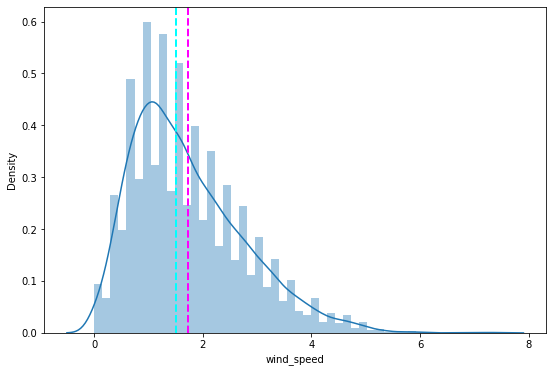

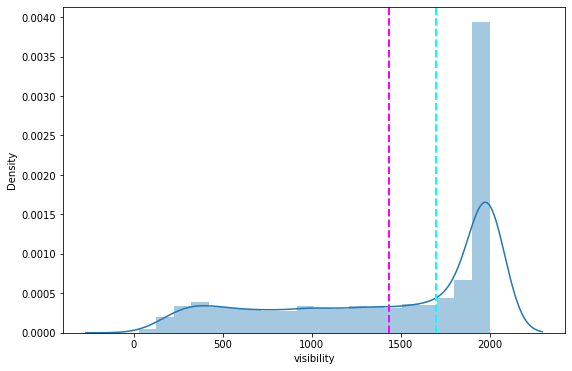

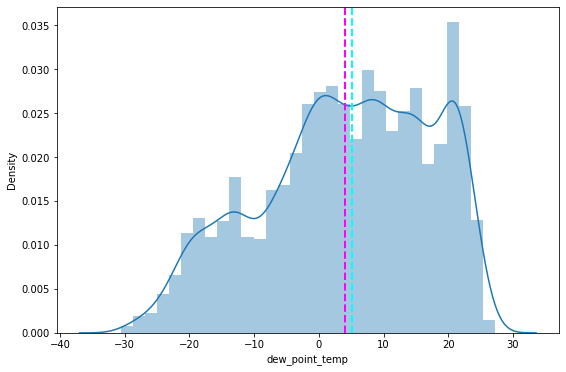

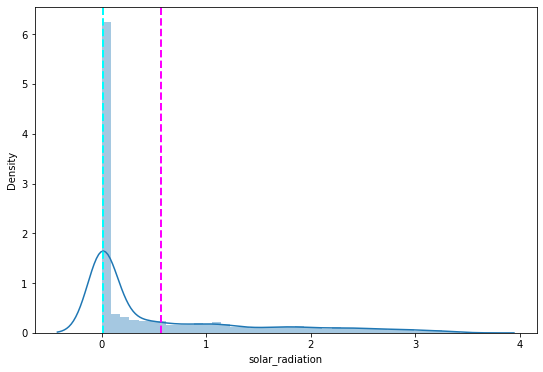

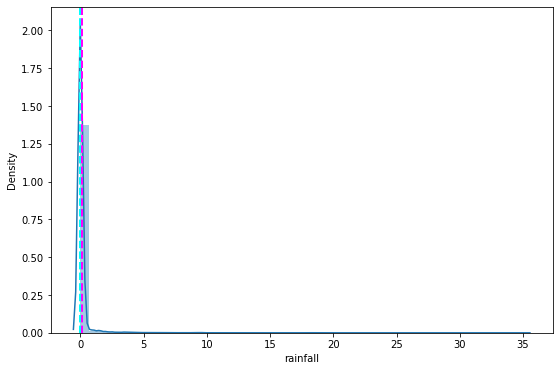

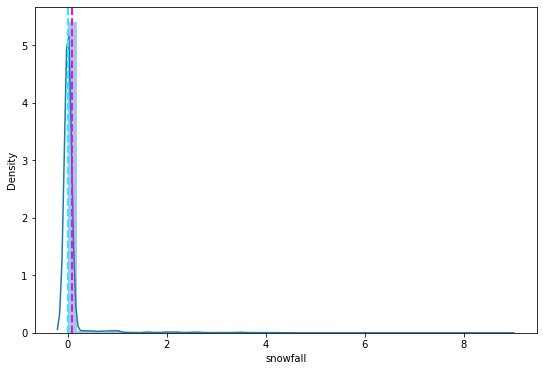

In [611]:
# Analysing distribution of all numerical variables
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data_df[col]
    sns.distplot(x=bike_data_df[col])
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.xlabel(col)
plt.show()

## Numerical variables analysis with respect to dependent variable

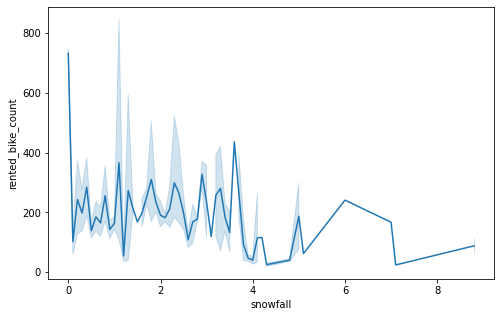

In [718]:
# 1)Relationship between snowfall and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data=bike_data_df,x='snowfall',y='rented_bike_count')

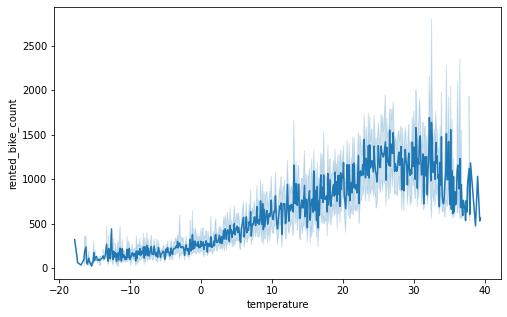

In [720]:
#2 Relationship between temperature and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data=bike_data_df,x='temperature',y='rented_bike_count')

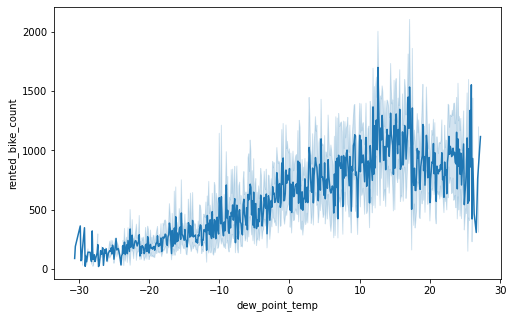

In [721]:
# 3)Relationship between dew_point_temp and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data=bike_data_df,x='dew_point_temp',y='rented_bike_count')

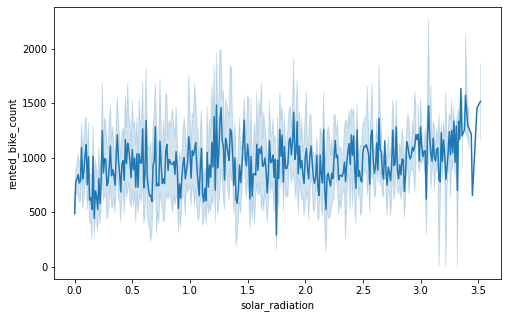

In [722]:
# 4)Relationship between solar_radiation and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data=bike_data_df,x='solar_radiation',y='rented_bike_count')

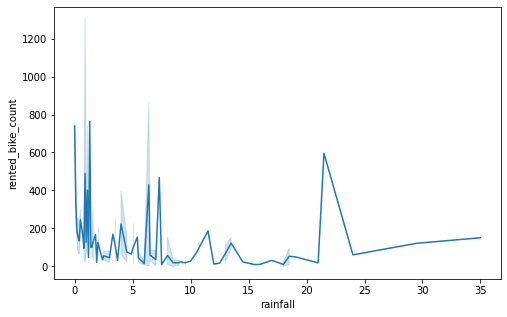

In [724]:
# 5)Relationship between rainfall and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data=bike_data_df,x='rainfall',y='rented_bike_count')

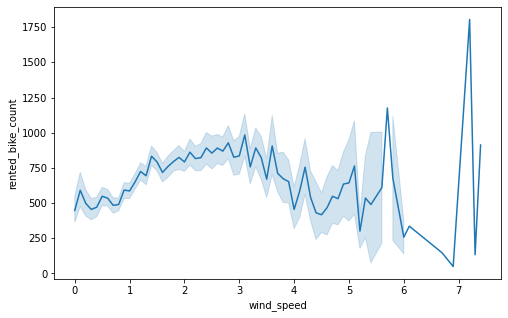

In [725]:
# Relationship between wind_speed and rented_bike_count
fig.ax=plt.subplots(figsize=(8,5))
sns.lineplot(data=bike_data_df,x='wind_speed',y='rented_bike_count')

## Categorical variables analysis with respect to dependent variable

[Text(0.5, 1.0, 'Monthly Count of Rented Bike')]

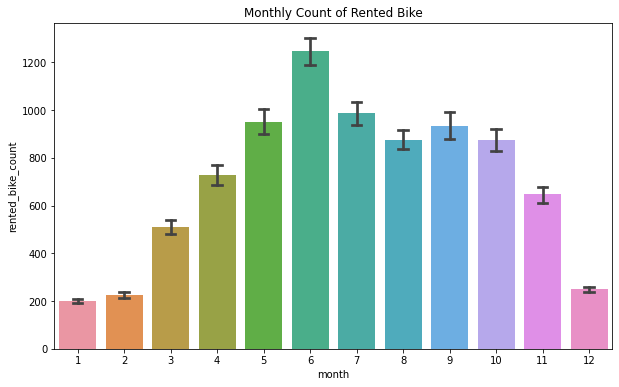

In [612]:
# Dependent variable(rented_bike_count) plot with respect to Month
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=bike_data_df,x='month',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Monthly Count of Rented Bike')

**Insight**: From above plot we can see that from 5th month till 10th month the demand is high as compared to the months which has winter season.

[Text(0.5, 1.0, 'Count of Bikes on Weekdays & Weekend')]

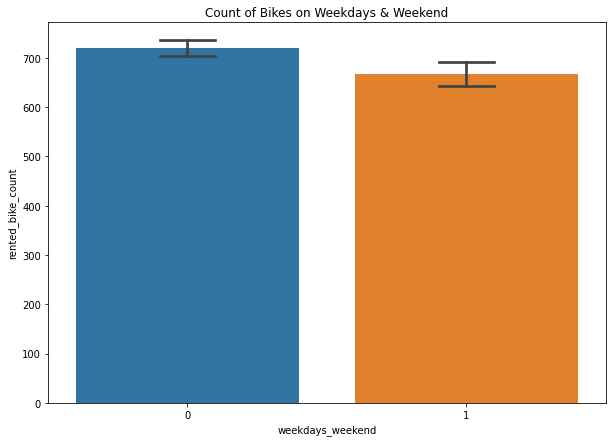

In [613]:
# Plot count of bike on weekdays and weekend
fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(data=bike_data_df,x='weekdays_weekend',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Bikes on Weekdays & Weekend')

[Text(0.5, 1.0, 'Count of Bikes on Hourly Basis')]

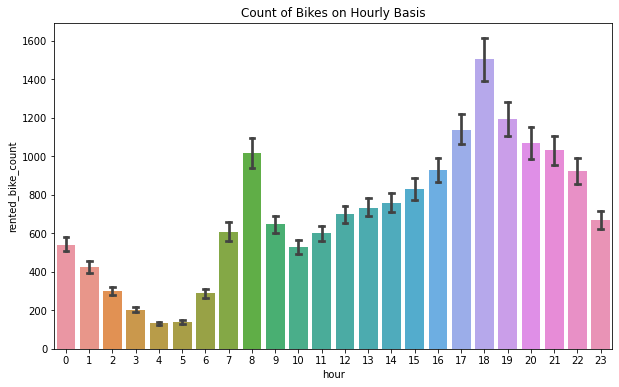

In [614]:
# Plot count of bike on hourly basis
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=bike_data_df,x='hour',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Bikes on Hourly Basis')

**Insight**: We can clearly see from above plot that bike count is more during the evening time.

[Text(0.5, 1.0, 'Count of Bikes on Hourly Basis on Weekdays & Weekend')]

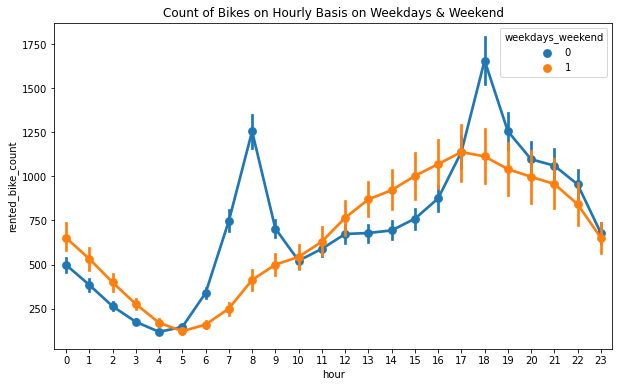

In [615]:
# plotting comparison of bike count on hourly basis on weekdays and weekend
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=bike_data_df,x='hour',y='rented_bike_count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Bikes on Hourly Basis on Weekdays & Weekend')

**Insight**: We can see that bike count is more on the weekend and peek time of demand is in the evening. 

[Text(0.5, 1.0, 'Count of Bikes as per Seasons')]

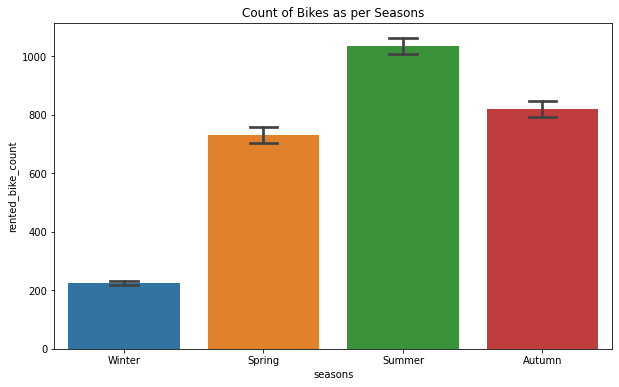

In [616]:
# Plotting bike count as per seasons
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=bike_data_df,x='seasons',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Bikes as per Seasons')

**Insight**: The above plot concludes that in summer the count is more than 1000 but in winters the count is around 200 which says that in winters the demand reduces drastically.

[Text(0.5, 1.0, 'Count of Bikes as per Seasons on Hourly Basis')]

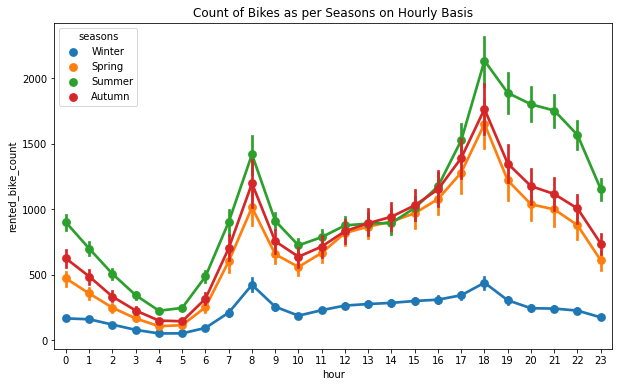

In [617]:
# Comparing bike count as per seasons on hourly basis
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=bike_data_df,x='hour',y='rented_bike_count',hue='seasons',ax=ax)
ax.set(title='Count of Bikes as per Seasons on Hourly Basis')

**Insight**: In above plot we can see that in summer the count of bike increases from 7:00am to 9:00 am and in the evening 5pm to 7pm which is almost same as autumn and spring. But in winters it's very low.

[Text(0.5, 1.0, 'Count of Bikes as per Seasons on Hourly Basis')]

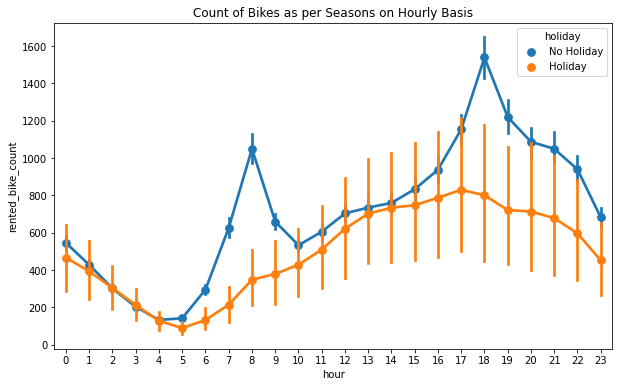

In [618]:
# Comparing bike count on hourly basis on Holiday
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=bike_data_df,x='hour',y='rented_bike_count',hue='holiday',ax=ax)
ax.set(title='Count of Bikes as per Seasons on Hourly Basis')

**Insight**: In above plot we can see that demand of bikes on holidays is hight almost through out the day as compared to working days on which demand is high mostly after 6pm in the evening.

# Regression Plot:
*   It helps to visualize the linear relationship between two parameters. It also intend to add visual guide that helps to emphasize on patterns in the datset while performing EDA.

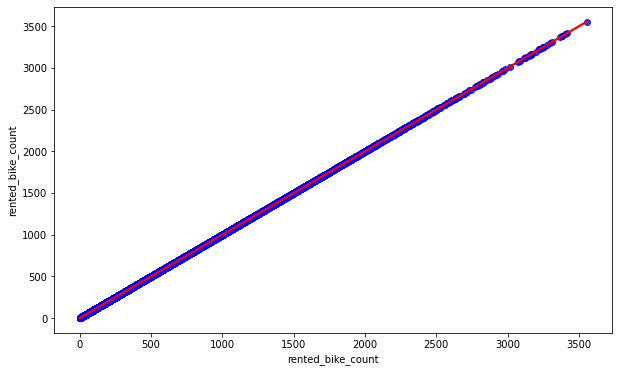

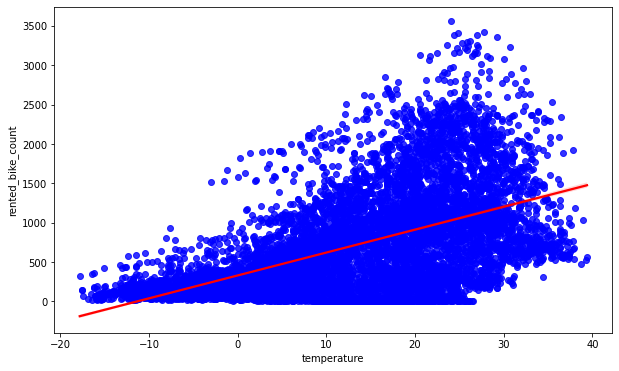

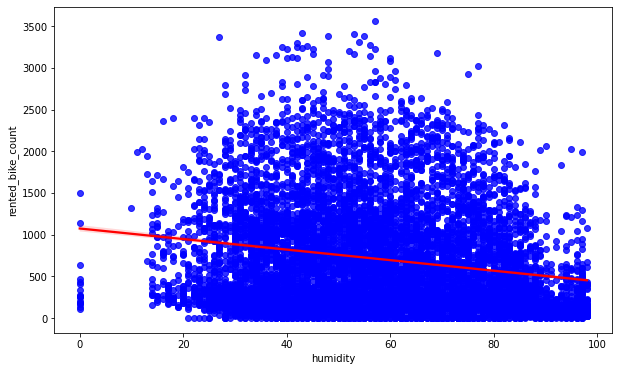

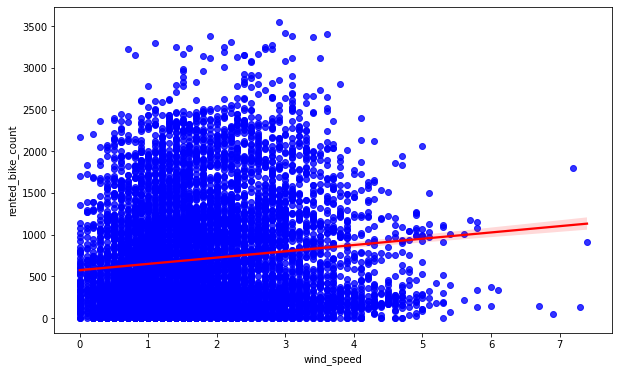

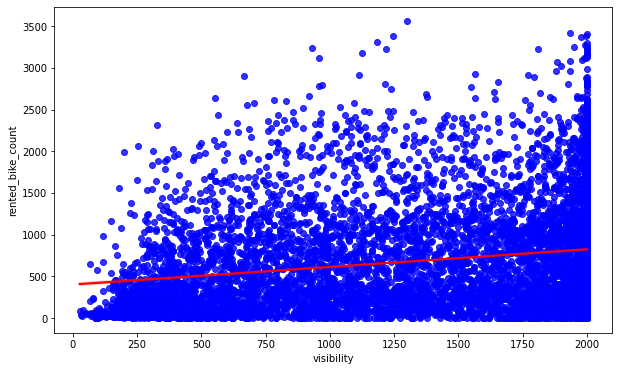

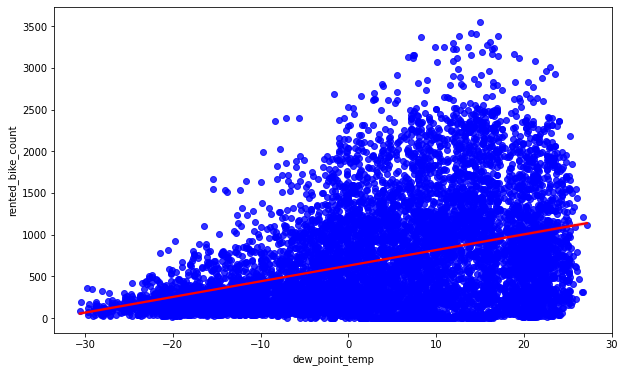

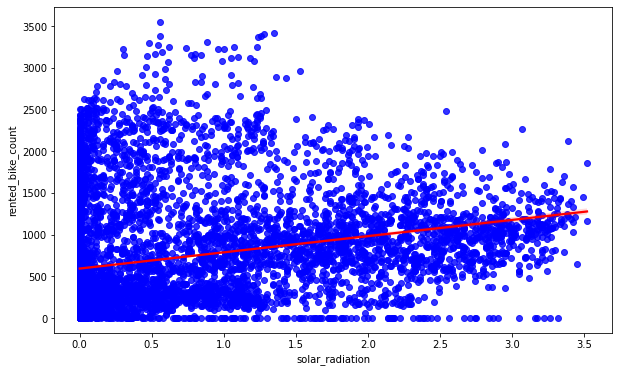

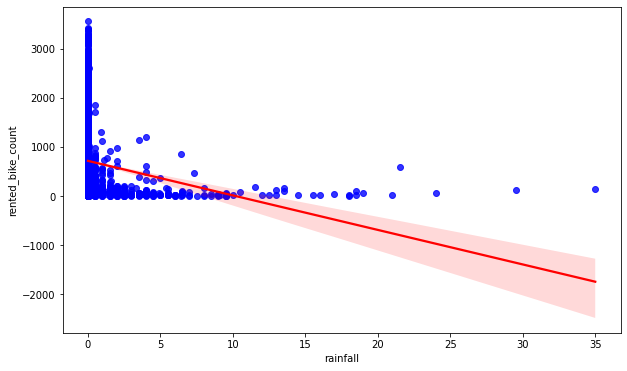

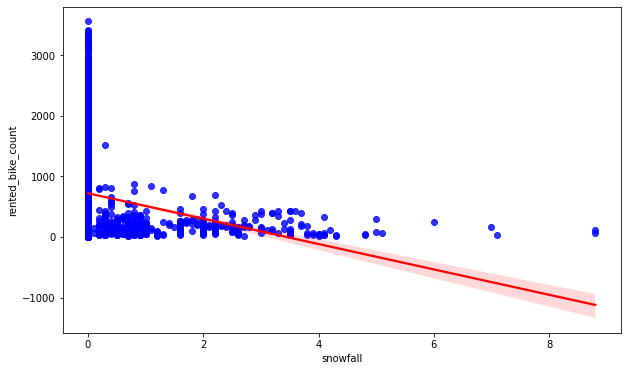

In [619]:
# Plotting regression plot for the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_data_df[col],y=bike_data_df['rented_bike_count'],scatter_kws={'color':'blue'},line_kws={'color':'red'})

**Conclusion:** From above plot we can conclude that columns 'temp','wind_speed','visibility','dew_point_temp', and 'solar_radiation' are positively related to target or dependent variable which means bike count increase with the increase of these features.

Also 'rainfall','snowfall' and 'humidity' are negatively related to target variable which means bike count decreases with increase in these values.

# Normalisation of Target Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


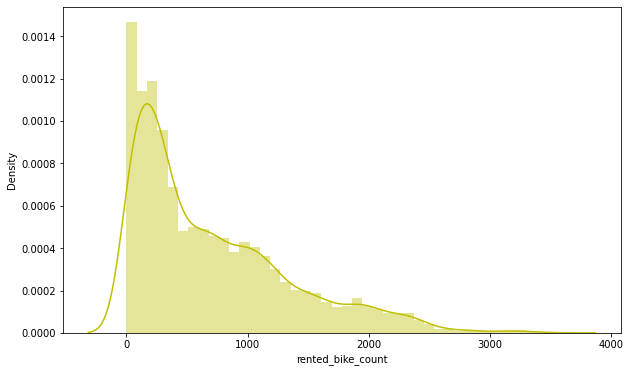

In [620]:
# Distribution plot to check the skewness
plt.figure(figsize=(10,6))
sns.distplot(bike_data_df['rented_bike_count'],color="y")

**Conclusion**: The assumption of linear regression is that dependent variable must have normal distribution but in above plot the target variable is right skewed,so we should try to make it normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


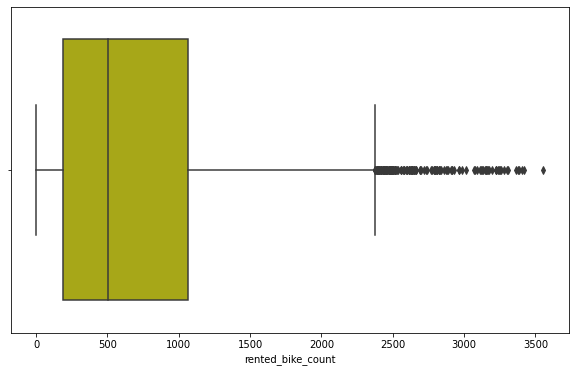

In [621]:
# checking the outlier in dataset
plt.figure(figsize=(10,6))
sns.boxplot((bike_data_df['rented_bike_count']),color="y")

**Conclusion:** From the above plot we can conclude that there is outlier present in our data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


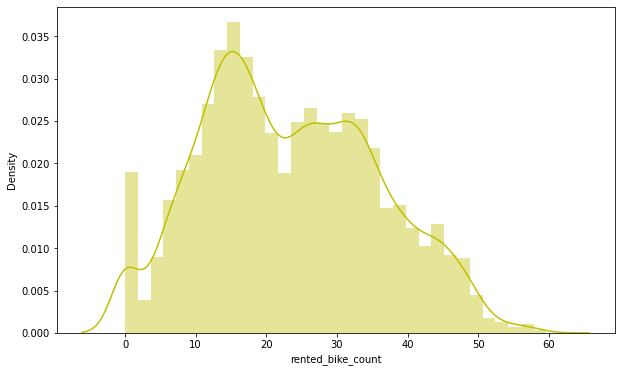

In [622]:
# Improve skewness and make it normal distribution
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(bike_data_df['rented_bike_count']),color="y")

**Conclusion:** We can see that the plot is nearly normally distributed after applying Square root method which is a genric rule.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


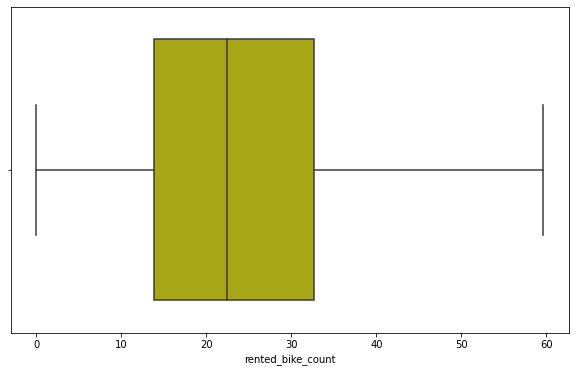

In [623]:
# Check if outliers are still present after applying square root method.
plt.figure(figsize=(10,6))
sns.boxplot(np.sqrt(bike_data_df['rented_bike_count']),color="y")

**Conclusion:** After applying square root method we can observe that outliers have been removed.

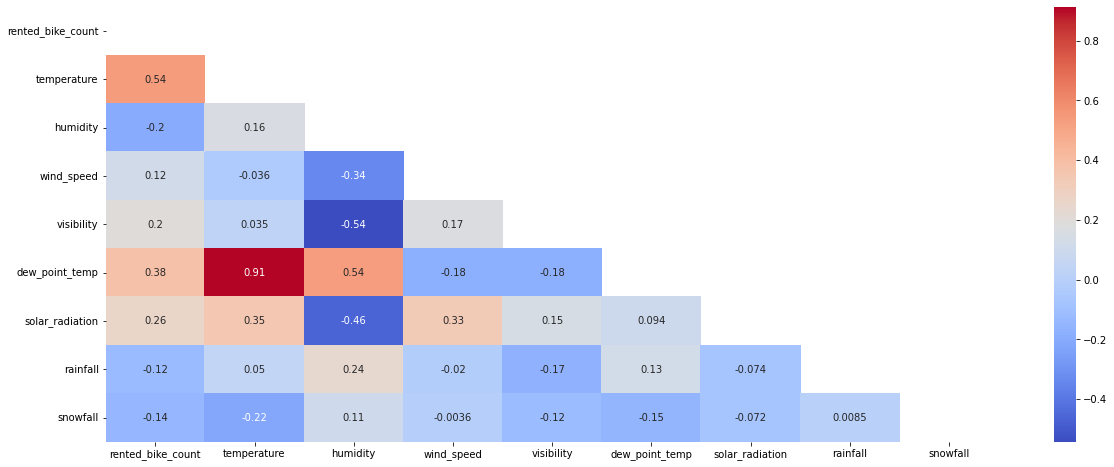

In [624]:
plt.figure(figsize=(20,8))
correlation = bike_data_df.corr()
mask = np.triu(np.ones_like(bike_data_df.corr()))
sns.heatmap((correlation),mask=mask,annot=True,cmap='coolwarm')

**Conclusion:** We can observe that temperature,dew point and solar radiation are high positively correlated besides humidity and rainfall which are most negatively correlated.

# Creating Dummy Variable

*  A dataset has different variables so in order to use category variable efficiently while programming, we need to create dummy variables.


In [625]:
# Giving variable name to all categorical features
categorical_features = list(bike_data_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['hour', 'seasons', 'holiday', 'functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

# One Hot Encoding:

*  It is a method of converting data to prepare it for an algorithm and get a better prediction.
*   In this method we convert each categorical value into a new categorical column and assign a binary value 0 or 1.



In [626]:
# Create a copy of dataset
bike_data_copy = bike_data_df.copy()

In [627]:
# Apply one hot encoding
bike_data_copy = pd.get_dummies(bike_data_copy, columns=["hour", "seasons","holiday","functioning_day","month","weekdays_weekend"], prefix=["hour", "seasons","holiday","functioning_day","month","weekdays_weekend"])

In [628]:
# Check after applying one hot encoding
bike_data_copy.head()

,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,functioning_day_No,functioning_day_Yes,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_0,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


# **Train-Test Split**

*   It is a rule to split dataset into train and test before fitting any model.
*   This means some percentage of data will go into training model and some into testing the model which evaluate how is the performance of model on any unseen data.
*   The most widely used ratio of dataset is 80:20 for train and test respectively. Here we will split our datset using scikit learn library.





In [629]:
# Assign the value in X and y
X = bike_data_copy.drop(columns=['rented_bike_count'],axis=1)
y = np.sqrt(bike_data_copy['rented_bike_count'])

In [630]:
X.head()

,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,functioning_day_No,functioning_day_Yes,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_0,weekdays_weekend_1
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [631]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: rented_bike_count, dtype: float64

In [632]:
# Creating train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 0)
print(X_train.shape)
print(X_test.shape)

(6570, 54)
(2190, 54)


In [633]:
bike_data_copy.describe().columns

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'seasons_Autumn',
       'seasons_Spring', 'seasons_Summer', 'seasons_Winter', 'holiday_Holiday',
       'holiday_No Holiday', 'functioning_day_No', 'functioning_day_Yes',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_0', 'weekdays_weekend_1'],
      dtype='object')

# **Linear Regression**

In [634]:
# Apply Linear regression model and check the score
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_train,y_train)

0.7739500172612678

In [635]:
# check the coefficient
reg.coef_

array([ 1.00716898e-01, -2.37171308e-01, -3.83515085e-02,  9.88932333e-04,
        4.48649197e-01,  1.10233005e+00, -1.42620254e+00,  1.97982166e-02,
       -1.31556909e+09, -1.31556909e+09, -1.31556910e+09, -1.31556910e+09,
       -1.31556910e+09, -1.31556910e+09, -1.31556910e+09, -1.31556909e+09,
       -1.31556908e+09, -1.31556909e+09, -1.31556910e+09, -1.31556910e+09,
       -1.31556909e+09, -1.31556909e+09, -1.31556909e+09, -1.31556909e+09,
       -1.31556909e+09, -1.31556909e+09, -1.31556908e+09, -1.31556908e+09,
       -1.31556909e+09, -1.31556909e+09, -1.31556909e+09, -1.31556909e+09,
        2.93665977e+09, -2.54200908e+09, -5.11295142e+09,  8.14939848e+08,
       -7.46422988e+07, -7.46422953e+07,  4.19727253e+08,  4.19727281e+08,
       -4.99133221e+09, -4.99133221e+09, -1.63438328e+09, -1.63438327e+09,
       -1.63438327e+09,  9.36559066e+08,  9.36559060e+08,  9.36559057e+08,
       -7.11305212e+09, -7.11305212e+09, -7.11305212e+09, -4.99133221e+09,
       -1.05208565e+09, -

In [636]:
# Get the X_train and X_test value
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [637]:
# Calculate values on train data
# Calculate Mean Square Error(MSE)
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE:',MSE)

# Calculate Mean Absolute Error(MAE)
MAE = mean_absolute_error(y_train,y_pred_train)
print('MAE:',MAE)

# Calculate Root Mean Square Error(RMSE)
RMSE = np.sqrt(MSE)
print('RMSE:',RMSE)

# Calculate r2 and adjusted r2 score
r2 = r2_score(y_train,y_pred_train)
print('R2:',r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 34.809590284396606
MAE: 4.444145219706218
RMSE: 5.899965278236526
R2: 0.7739500172612678
Adjusted R2: 0.7682325938102648


**Conclusion:** The r2 score on train set is 0.77 which tells that our model is able to capture most of the data variance.

In [638]:
# Storing the metrics value for later comparison
dict_1 = {'Model':'Linear regression',
          'MSE': round((MSE),2),
          'MAE': round((MAE),2),
          'RMSE': round((RMSE),2),
          'R2': round((r2),2),
          'Adjusted R2':round((Adjusted_R2),2)
          }         
train_df = pd.DataFrame(dict_1,index=[1])

In [639]:
# Calculate values on test data
# Calculate Mean Square Error(MSE)
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE:',MSE)

# Calculate Mean Absolute Error(MAE)
MAE = mean_absolute_error(y_test,y_pred_test)
print('MAE:',MAE)

# Calculate Root Mean Square Error(RMSE)
RMSE = np.sqrt(MSE)
print('RMSE:',RMSE)

# Calculate r2 and adjusted r2 score
r2 = r2_score(y_test,y_pred_test)
print('R2:',r2)
Adjusted_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 33.08545733533
MAE: 4.373211573261855
RMSE: 5.751995943612095
R2: 0.7905538352793771
Adjusted R2: 0.785256367881291


Conclusion: The r2 score on our test data is 0.79, which means our model is performing well on the data.

In [640]:
# Storing the metrics value in dataframe for later comparison
dict_2 = {'Model':'Linear regression',
          'MSE': round((MSE),2),
          'MAE': round((MAE),2),
          'RMSE': round((RMSE),2),
          'R2': round((r2),2),
          'Adjusted R2':round((Adjusted_R2),2)
          }   
test_df = pd.DataFrame(dict_2,index=[1])     

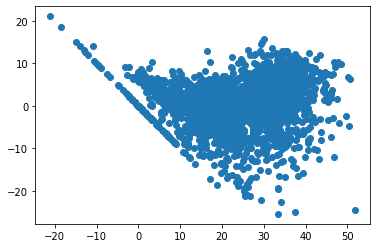

In [641]:
# Check Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))


*   **Heteroscadacity** shows unequal variance or scatter


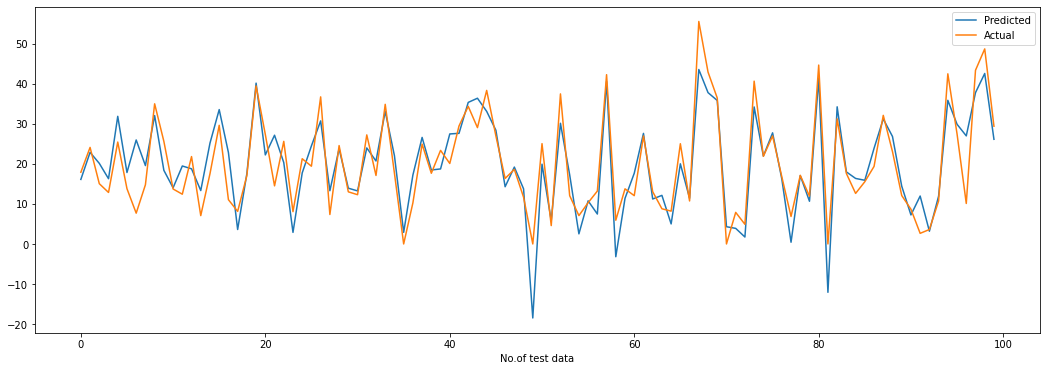

In [642]:
# Plot between actual and predicted values
plt.figure(figsize=(18,6))
plt.plot(y_pred_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(['Predicted','Actual'])
plt.xlabel('No.of test data')
plt.show()


# **Elastic Net Regression**

In [643]:
# a*L1+b*L2
# alpha = a+b and L1_ratio = a/(a+b)
elasticnet = ElasticNet(alpha=0.1,l1_ratio=0.5)

In [644]:
# Apply the model
elasticnet.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+02, tolerance: 1.012e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ElasticNet(alpha=0.1)

In [645]:
# Hyperparameter Tuning
enet_model = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(enet_model,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.227e+04, tolerance: 8.221e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.152e+04, tolerance: 8.056e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [646]:
print('The best fit of alpha value is:' ,elastic_regressor.best_params_)
print('\nUsing',elastic_regressor.best_params_,'the negative mean squared error is:',elastic_regressor.best_score_)

The best fit of alpha value is: {'alpha': 0.0001, 'l1_ratio': 0.3}

Using {'alpha': 0.0001, 'l1_ratio': 0.3} the negative mean squared error is: -35.563707065745426


In [647]:
# Check the score
elasticnet.score(X_train,y_train)

0.656983502112293

In [648]:
# Get the X_train and X_test value
y_pred_train_enet = elasticnet.predict(X_train)
y_pred_test_enet = elasticnet.predict(X_test)

In [649]:
# Calculate values on train data
# Mean Square Error(MSE)
MSE_enet= mean_squared_error((y_train), (y_pred_train_enet))
print('MSE:',MSE_enet)

# Calculate Mean Absolute Error(MAE)
MAE_enet = mean_absolute_error(y_train, y_pred_train_enet)
print('MAE:', MAE_enet)

# Calculate Root Mean Square Error(RMSE)
RMSE_enet = np.sqrt(MSE_enet)
print('RMSE:', RMSE_enet)

# Calculate r2 and adjusted r2
r2_enet = r2_score(y_train,y_pred_train_enet)
print('R2:',r2_enet)
Adjusted_R2_enet = (1-(1-r2_score(y_train,y_pred_train_enet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_enet:',1-(1-r2_score(y_train,y_pred_train_enet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 52.82134334891851
MAE: 5.5795881051333645
RMSE: 7.26782934230837
R2: 0.656983502112293
Adjusted_R2_enet: 0.6483076749994423


**Conclusion:** The r2 score is 0.64 which means our model is able to capture most of data variance.

In [650]:
# Storing the metrics values for later comparisons
dict_1 = {'Model':'Elastic net regression',
          'MSE': round((MSE_enet),2),
          'MAE': round((MAE_enet),2),
          'RMSE': round((RMSE_enet),2),
          'R2': round((r2_enet),2),
          'Adjusted R2':round((Adjusted_R2_enet),2)
          }   
train_df = train_df.append(dict_1,ignore_index=True)    

In [651]:
# Calculate values on test data
# Mean Square Error(MSE)
MSE_enet= mean_squared_error((y_test), (y_pred_test_enet))
print('MSE:',MSE_enet)

# Calculate Mean Absolute Error(MAE)
MAE_enet = mean_absolute_error(y_test, y_pred_test_enet)
print('MAE:', MAE_enet)

# Calculate Root Mean Square Error(RMSE)
RMSE_enet = np.sqrt(MSE_enet)
print('RMSE:', RMSE_enet)

# Calculate r2 and adjusted r2
r2_enet = r2_score(y_test,y_pred_test_enet)
print('R2:',r2_enet)
Adjusted_R2_enet = (1-(1-r2_score(y_test,y_pred_test_enet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_enet:',1-(1-r2_score(y_test,y_pred_test_enet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 53.60950701580872
MAE: 5.626447396020635
RMSE: 7.321851338002481
R2: 0.660627159442816
Adjusted_R2_enet: 0.652043490407646


**Conclusion:** The r2 score of test set is 0.66, which means our model will perform well on the data.

In [652]:
# Storing the test metrics values for later comparisons
dict_2 = {'Model':'Elastic net regression',
          'MSE': round((MSE_enet),2),
          'MAE': round((MAE_enet),2),
          'RMSE': round((RMSE_enet),2),
          'R2': round((r2_enet),2),
          'Adjusted R2':round((Adjusted_R2_enet),2)
          }   
test_df = test_df.append(dict_2,ignore_index=True)

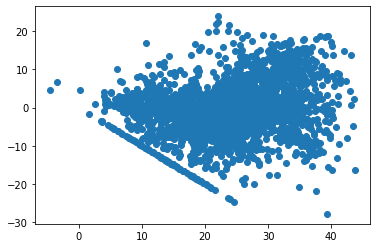

In [653]:
# Check Heteroscadacity
plt.scatter((y_pred_test_enet),(y_test)-(y_pred_test_enet))

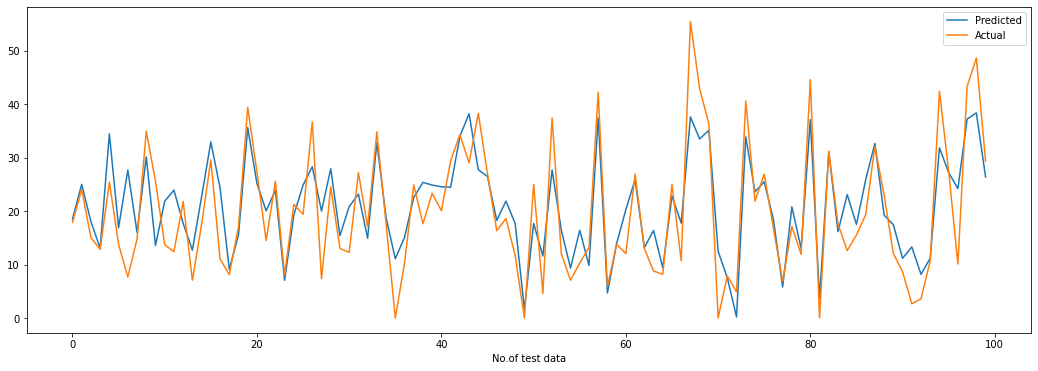

In [654]:
# Plot between actual and predicted value
plt.figure(figsize=(18,6))
plt.plot(y_pred_test_enet[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(['Predicted','Actual'])
plt.xlabel('No.of test data')
plt.show()

# **Lasso Regression**

In [655]:
# Create a instance of Lasso regression implementation
lasso = Lasso(alpha=1.0,max_iter=3000) 

In [656]:
# Apply the model and create the model score
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train),lasso.score(X_test,y_test))

0.40607960378573027 0.387939387361117


##**Hyperparameter Tuning**

In [657]:
# Hyperparameter tuning using GridSearchCv
lasso_model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso_model,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.227e+04, tolerance: 8.221e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.152e+04, tolerance: 8.056e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [658]:
print('The best fit of alpha value is:' ,lasso_regressor.best_params_)
print('\nUsing',lasso_regressor.best_params_,'the negative mean squared error is:',lasso_regressor.best_score_)

The best fit of alpha value is: {'alpha': 0.0001}

Using {'alpha': 0.0001} the negative mean squared error is: -35.56430764259319


In [659]:
# Get the X_train and X_test value
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test) 

In [660]:
# Calculate values on train data
# Calculate Mean Square Error
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE:',MSE_lasso)

# Calculate Mean Absolute Error(MAE)
MAE_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
print('MAE:', MAE_lasso)

# Calculate Root Mean Square Error(RMSE)
RMSE_lasso = np.sqrt(MSE_enet)
print('RMSE:', RMSE_lasso)

# Calculate r2 and adjusted r2
r2_lasso = r2_score(y_train,y_pred_train_lasso)
print('R2:',r2_lasso)
Adjusted_R2_lasso = (1-(1-r2_score(y_train,y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_lasso:',1-(1-r2_score(y_train,y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 91.45820496549345
MAE: 7.242373211166085
RMSE: 7.321851338002481
R2: 0.40607960378573027
Adjusted_R2_lasso: 0.39105772959576757


The r2 score is 0.40 which is very less for the model to capture most of the data variance.

In [661]:
# Storing the metrics values for later comparisons
dict_1 = {'Model':'Lasso regression',
          'MSE': round((MSE_lasso),2),
          'MAE': round((MAE_lasso),2),
          'RMSE': round((RMSE_lasso),2),
          'R2': round((r2_lasso),2),
          'Adjusted R2':round((Adjusted_R2_lasso),2)
          }   
train_df = train_df.append(dict_1,ignore_index=True)

In [662]:
# Calculate values on test data
# Calculate Mean Square Error
MSE_lasso= mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE:',MSE_lasso)

# Calculate Mean Absolute Error(MAE)
MAE_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
print('MAE:', MAE_lasso)

# Calculate Root Mean Square Error(RMSE)
RMSE_lasso = np.sqrt(MSE_lasso)
print('RMSE:', RMSE_lasso)

# Calculate r2 and adjusted r2
r2_lasso = r2_score(y_test,y_pred_test_lasso)
print('R2:',r2_lasso)
Adjusted_R2_lasso = (1-(1-r2_score(y_test,y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_lasso:',1-(1-r2_score(y_test,y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 96.68501360772724
MAE: 7.4419572551489805
RMSE: 9.832853787569876
R2: 0.387939387361117
Adjusted_R2_lasso: 0.3724586973927331


**Conclusion:** The r2 score is 0.38 on test data which means our model is not performing on the data.

In [663]:
# Storing the test metrics values for later comparisons
dict_2 = {'Model':'Lasso regression',
          'MSE': round((MSE_lasso),2),
          'MAE': round((MAE_lasso),2),
          'RMSE': round((RMSE_lasso),2),
          'R2': round((r2_lasso),2),
          'Adjusted R2':round((Adjusted_R2_lasso),2)
          }   
test_df = test_df.append(dict_2,ignore_index=True)

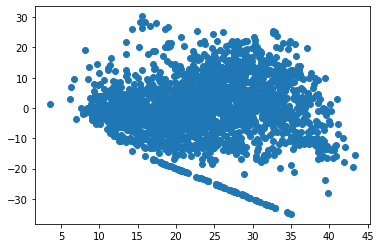

In [664]:
# Check Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso))

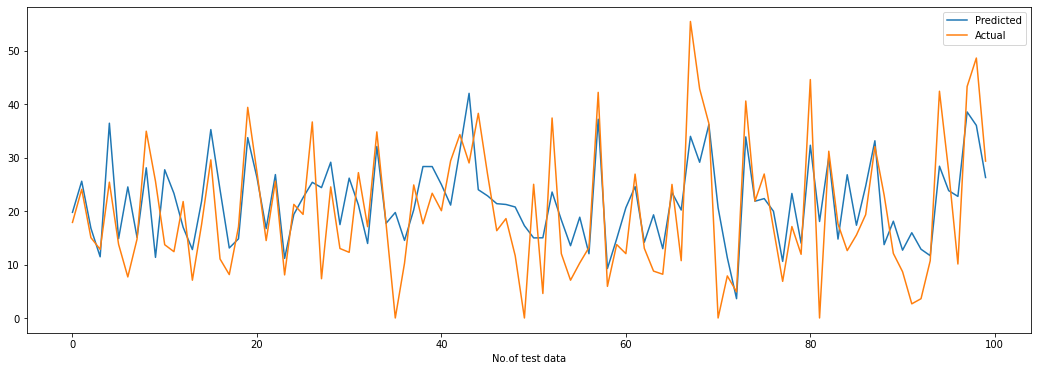

In [665]:
# Plot between actual and predicted value
plt.figure(figsize=(18,6))
plt.plot(y_pred_test_lasso[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(['Predicted','Actual'])
plt.xlabel('No.of test data')
plt.show()

# **Ridge Regression**

In [666]:
# Apply the model and check the score
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)

0.7739499765544194

In [667]:
ridge_model = Ridge()
parameters_r = {'alpha': [1e-20,1e-15,1e-10,1e-7,1e-8,1e-9,1e-6,2,3,11,21,33,42,49,57,59,64,111]}
ridge_regressor = GridSearchCV(ridge_model,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.34414e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.54888e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.3589e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.64759e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditi

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [668]:
print('The best fit of alpha value is:' ,ridge_regressor.best_params_)
print('\nUsing',ridge_regressor.best_params_,'the negative mean squared error is:',ridge_regressor.best_score_)

The best fit of alpha value is: {'alpha': 1}

Using {'alpha': 1} the negative mean squared error is: -35.56317205507596


In [669]:
# Get the X_train and X_test value
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [670]:
# Calculate values on train data
# Calculate Mean Square Error
MSE_ridge= mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE:',MSE_ridge)

# Calculate Mean Absolute Error(MAE)
MAE_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
print('MAE:', MAE_ridge)

# Calculate Root Mean Square Error(RMSE)
RMSE_ridge = np.sqrt(MSE_ridge)
print('RMSE:', RMSE_ridge)

# Calculate r2 and adjusted r2
r2_ridge = r2_score(y_train,y_pred_train_ridge)
print('R2:',r2_ridge)
Adjusted_R2_ridge = (1-(1-r2_score(y_train,y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_ridge:',1-(1-r2_score(y_train,y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 34.80959655287182
MAE: 4.444207438053352
RMSE: 5.899965809466341
R2: 0.7739499765544194
Adjusted_R2_ridge: 0.7682325520738287


**Conclusion:** The r2 score is 0.77 which means our model will capture most of the data variance.

In [671]:
# Storing the metrics values for later comparisons
dict_1 = {'Model':'Ridge regression',
          'MSE': round((MSE_ridge),2),
          'MAE': round((MAE_ridge),2),
          'RMSE': round((RMSE_ridge),2),
          'R2': round((r2_ridge),2),
          'Adjusted R2':round((Adjusted_R2_ridge),2)
          }   
train_df = train_df.append(dict_1,ignore_index=True)

In [672]:
# Calculate values on test data
# Calculate Mean Square Error
MSE_ridge= mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE:',MSE_ridge)

# Calculate Mean Absolute Error(MAE)
MAE_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
print('MAE:', MAE_ridge)

# Calculate Root Mean Square Error(RMSE)
RMSE_ridge = np.sqrt(MSE_ridge)
print('RMSE:', RMSE_ridge)

# Calculate r2 and adjusted r2
r2_ridge = r2_score(y_test,y_pred_test_ridge)
print('R2:',r2_ridge)
Adjusted_R2_ridge = (1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_ridge:',1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 33.086058293578674
MAE: 4.373346072127594
RMSE: 5.752048182480626
R2: 0.7905500309372135
Adjusted_R2_ridge: 0.7852524673168901


The r2 score on test set is 0.79 which means linear model is performing well on data.

In [673]:
# Storing the test metrics values for later comparisons
dict_2 = {'Model':'Ridge regression',
          'MSE': round((MSE_ridge),2),
          'MAE': round((MAE_ridge),2),
          'RMSE': round((RMSE_ridge),2),
          'R2': round((r2_ridge),2),
          'Adjusted R2':round((Adjusted_R2_ridge),2)
          }   
test_df = test_df.append(dict_2,ignore_index=True)

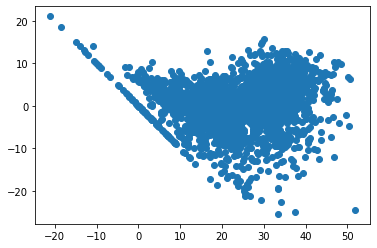

In [674]:
# Check Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

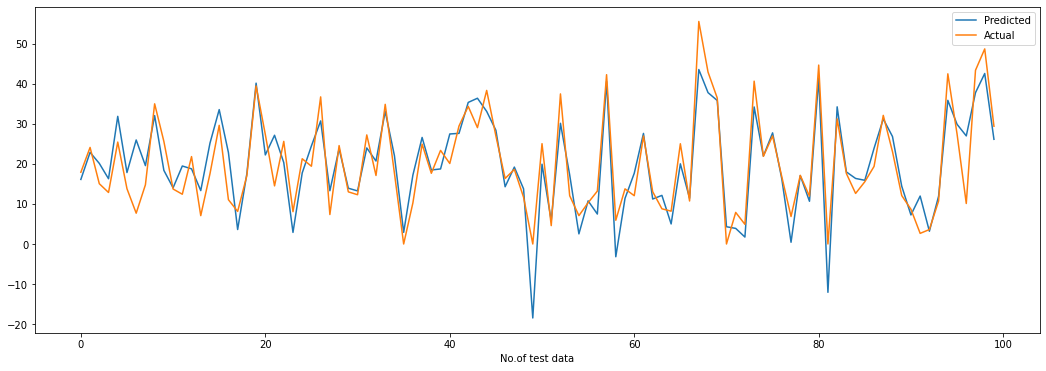

In [675]:
# Plot between actual and predicted value
plt.figure(figsize=(18,6))
plt.plot(y_pred_test_ridge[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(['Predicted','Actual'])
plt.xlabel('No.of test data')
plt.show()

# **Decision** **Trees**

In [676]:
# Fit the model and check the score
decision_tree = DecisionTreeRegressor(criterion='mse',max_depth=8,
                max_features=9,max_leaf_nodes=100,)
decision_tree.fit(X_train,y_train)
decision_tree.score(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


0.678696820406015

In [677]:
# Get the X_train and X_test value
y_pred_train_decision = decision_tree.predict(X_train)
y_pred_test_decision = decision_tree.predict(X_test)

In [678]:
# Check the values on train dataset
# Calculate Mean Square Error
MSE_decision= mean_squared_error((y_train), (y_pred_train_decision))
print('MSE:',MSE_decision)

# Calculate Mean Absolute Error(MAE)
MAE_decision = mean_absolute_error(y_train, y_pred_train_decision)
print('MAE:', MAE_decision)

# Calculate Root Mean Square Error(RMSE)
RMSE_decision = np.sqrt(MSE_decision)
print('RMSE:', RMSE_decision)

# Calculate r2 and adjusted r2
r2_decision = r2_score(y_train,y_pred_train_decision)
print('R2:',r2_decision)
Adjusted_R2_decision = (1-(1-r2_score(y_train,y_pred_train_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_decision:',1-(1-r2_score(y_train,y_pred_train_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 49.47769472589365
MAE: 5.242214714047631
RMSE: 7.034038294315268
R2: 0.678696820406015
Adjusted_R2_decision: 0.6705701826083217


**Conclusion:** The r2 score is 0.69 which means our model is able to capture most of the data variance.

In [679]:
# Stroing the metrics values for later comparison
dict_1 = {'Model':'Decision tree regression',
          'MSE': round((MSE_decision),2),
          'MAE': round((MAE_decision),2),
          'RMSE': round((RMSE_decision),2),
          'R2': round((r2_decision),2),
          'Adjusted R2':round((Adjusted_R2_decision),2)
          }   
train_df = train_df.append(dict_1,ignore_index=True)

In [680]:
# Check the values on test dataset
# Calculate Mean Square Error
MSE_decision= mean_squared_error((y_test), (y_pred_test_decision))
print('MSE:',MSE_decision)

# Calculate Mean Absolute Error(MAE)
MAE_decision = mean_absolute_error(y_test, y_pred_test_decision)
print('MAE:', MAE_decision)

# Calculate Root Mean Square Error(RMSE)
RMSE_decision = np.sqrt(MSE_decision)
print('RMSE:', RMSE_decision)

# Calculate r2 and adjusted r2
r2_decision = r2_score(y_test,y_pred_test_decision)
print('R2:',r2_decision)
Adjusted_R2_decision = (1-(1-r2_score(y_test,y_pred_test_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_decision:',1-(1-r2_score(y_test,y_pred_test_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 58.95156331869834
MAE: 5.645129349351081
RMSE: 7.677992141093812
R2: 0.6268094856225095
Adjusted_R2_decision: 0.6173704749544138


**Conclusion:** The r2 score on test data is 0.65, which means our model will perform well on dataset.

In [681]:
# Stroing the test metrics values for later comparison
dict_2 = {'Model':'Decision tree regression',
          'MSE': round((MSE_decision),2),
          'MAE': round((MAE_decision),2),
          'RMSE': round((RMSE_decision),2),
          'R2': round((r2_decision),2),
          'Adjusted R2':round((Adjusted_R2_decision),2)
          }   
test_df = test_df.append(dict_2,ignore_index=True)

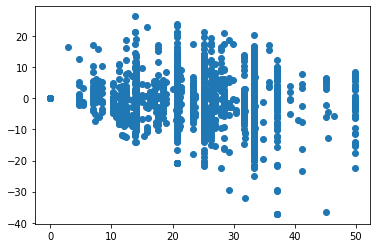

In [682]:
# Heteroscadacity
plt.scatter((y_pred_test_decision),(y_test)-(y_pred_test_decision))

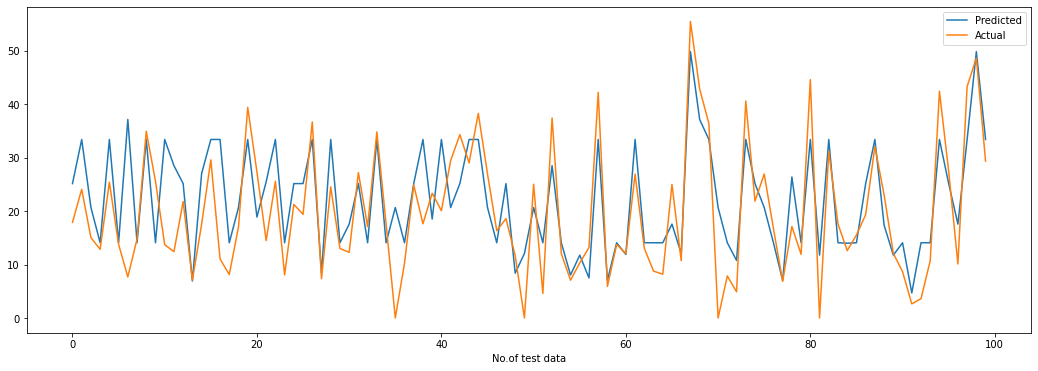

In [683]:
# Plot between actual and predicted value
plt.figure(figsize=(18,6))
plt.plot(y_pred_test_decision[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(['Predicted','Actual'])
plt.xlabel('No.of test data')
plt.show()

# **Random Forest**

# **Hyperparameter Tuning**

*   A hyper parameter is a parameter whose value is set before the learning process begins and it controls the learning process.
*  In hyperparameter tuning we choose a set of optimal hyperparameters for a learning algorithms.



In [684]:
# Number of trees in random forest
n_estimators = [60,100,150]

# Maximum number of levels in tree
max_depth = [5,7,9]

# Minimum number of samples required to split a node
min_samples_split = [150,180,250]

# Minimum number of samples required at each leaf node
min_samples_leaf = [80,90]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [685]:
param_dict

{'max_depth': [5, 7, 9],
 'min_samples_leaf': [80, 90],
 'min_samples_split': [150, 180, 250],
 'n_estimators': [60, 100, 150]}

In [686]:
# Use the random grid to search for best hyperparameters
#First create the base model to tune
rf_model = RandomForestRegressor()

# Random search of parameters,using 3 fold CV 
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 3, verbose = 2)

# Fit the random search model
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=60; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=60; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=60; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=100; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=150; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=150; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=150, n_estimators=150; total time=   1.4s
[CV] END max_d

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_leaf': [80, 90],
                         'min_samples_split': [150, 180, 250],
                         'n_estimators': [60, 100, 150]},
             verbose=2)

In [687]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=9, min_samples_leaf=80, min_samples_split=180)

In [688]:
# Fit the model and check the score
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
random_forest.score(X_train,y_train)

0.9897184550598318

In [689]:
# Get the X_train and X_test value
y_pred_train_randomforest = random_forest.predict(X_train)
y_pred_test_randomforest = random_forest.predict(X_test)

In [690]:
# Check the values on train dataset
# Calculate Mean Square Error
MSE_randomforest= mean_squared_error((y_train), (y_pred_train_randomforest))
print('MSE:',MSE_randomforest)

# Calculate Mean Absolute Error(MAE)
MAE_randomforest = mean_absolute_error(y_train, y_pred_train_randomforest)
print('MAE:', MAE_randomforest)

# Calculate Root Mean Square Error(RMSE)
RMSE_randomforest = np.sqrt(MSE_randomforest)
print('RMSE:', RMSE_randomforest)

# Calculate r2 and adjusted r2
r2_randomforest = r2_score(y_train,y_pred_train_randomforest)
print('R2:',r2_randomforest)
Adjusted_R2_randomforest = (1-(1-r2_score(y_train,y_pred_train_randomforest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_randomforest:',1-(1-r2_score(y_train,y_pred_train_randomforest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 1.5832620844369698
MAE: 0.7994010307779248
RMSE: 1.258277427452694
R2: 0.9897184550598318
Adjusted_R2_randomforest: 0.9894584066163803


**Conclusion:** The r2 value on train dataset for random forest model is 0.98 which means the model is able to capture most of the data variance.

In [691]:
# Stroing the metrics values for later comparison
dict_1 = {'Model':'Random forest regression',
          'MSE': round((MSE_randomforest),2),
          'MAE': round((MAE_randomforest),2),
          'RMSE': round((RMSE_randomforest),2),
          'R2': round((r2_randomforest),2),
          'Adjusted R2':round((Adjusted_R2_randomforest),2)
          }   
train_df = train_df.append(dict_1,ignore_index=True)

In [692]:
# Check the values on test dataset
# Calculate Mean Square Error
MSE_randomforest= mean_squared_error((y_test), (y_pred_test_randomforest))
print('MSE:',MSE_randomforest)

# Calculate Mean Absolute Error(MAE)
MAE_randomforest = mean_absolute_error(y_test, y_pred_test_randomforest)
print('MAE:', MAE_randomforest)

# Calculate Root Mean Square Error(RMSE)
RMSE_randomforest = np.sqrt(MSE_randomforest)
print('RMSE:', RMSE_randomforest)

# Calculate r2 and adjusted r2
r2_randomforest = r2_score(y_test,y_pred_test_randomforest)
print('R2:',r2_randomforest)
Adjusted_R2_randomforest = (1-(1-r2_score(y_test,y_pred_test_randomforest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_R2_randomforest:',1-(1-r2_score(y_test,y_pred_test_randomforest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 12.582052052929386
MAE: 2.204380100694835
RMSE: 3.5471188382868406
R2: 0.9203498225793827
Adjusted_R2_randomforest: 0.9183352513471985


**Conclusion:** The r2 score on test dataset is 0.92 which means our model is performing well on data

In [693]:
# Stroing the metrics values for later comparison
dict_2 = {'Model':'Random forest regression',
          'MSE': round((MSE_randomforest),2),
          'MAE': round((MAE_randomforest),2),
          'RMSE': round((RMSE_randomforest),2),
          'R2': round((r2_randomforest),2),
          'Adjusted R2':round((Adjusted_R2_randomforest),2)
          }   
test_df = test_df.append(dict_2,ignore_index=True)

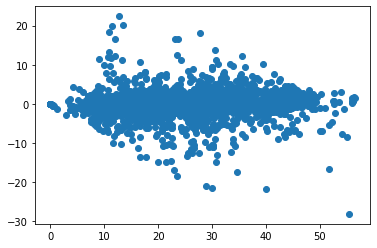

In [694]:
# Heteroscadacity
plt.scatter((y_pred_test_randomforest),(y_test)-(y_pred_test_randomforest))

In [695]:
random_forest.feature_importances_

array([3.04305017e-01, 1.50687176e-01, 1.10332319e-02, 1.04311077e-02,
       1.85981044e-02, 3.27816061e-02, 3.31489387e-02, 1.26154025e-03,
       3.60763567e-03, 5.47840808e-03, 1.24260054e-02, 1.90424871e-02,
       2.78010267e-02, 2.36069241e-02, 7.76294910e-03, 3.65378955e-03,
       1.32153027e-02, 9.83215708e-04, 2.05337941e-03, 1.04922746e-03,
       2.64464843e-04, 2.42251261e-04, 3.68451234e-04, 1.41695018e-03,
       3.50824844e-03, 1.06302893e-02, 3.10578158e-02, 1.78892508e-02,
       1.16971225e-02, 1.21681801e-02, 9.79914305e-03, 4.49922944e-03,
       1.43456468e-02, 1.71068353e-03, 7.64343815e-04, 7.32292824e-03,
       1.90250953e-03, 1.79128000e-03, 7.21610908e-02, 7.85670806e-02,
       1.96447477e-04, 2.54982547e-04, 4.02565057e-03, 1.25297644e-03,
       1.29170888e-03, 2.23909386e-03, 5.36878438e-04, 1.54067175e-03,
       6.00345727e-04, 1.82187501e-03, 1.25175354e-03, 7.48347641e-04,
       1.00313130e-02, 9.17392226e-03])

In [696]:
importances = random_forest.feature_importances_
importance_dict = {'Features':list(X_train.columns),
                   'Features Importance':importances}
importance_df = pd.DataFrame(importance_dict)
importance_df['Features Importance'] = round(importance_df['Features Importance'],2)
importance_df.sort_values(by=['Features Importance'],ascending=False)

,Features,Features Importance
0,temperature,0.30
1,humidity,0.15
39,functioning_day_Yes,0.08
38,functioning_day_No,0.07
5,solar_radiation,0.03
6,rainfall,0.03
26,hour_18,0.03
12,hour_4,0.03
11,hour_3,0.02
13,hour_5,0.02


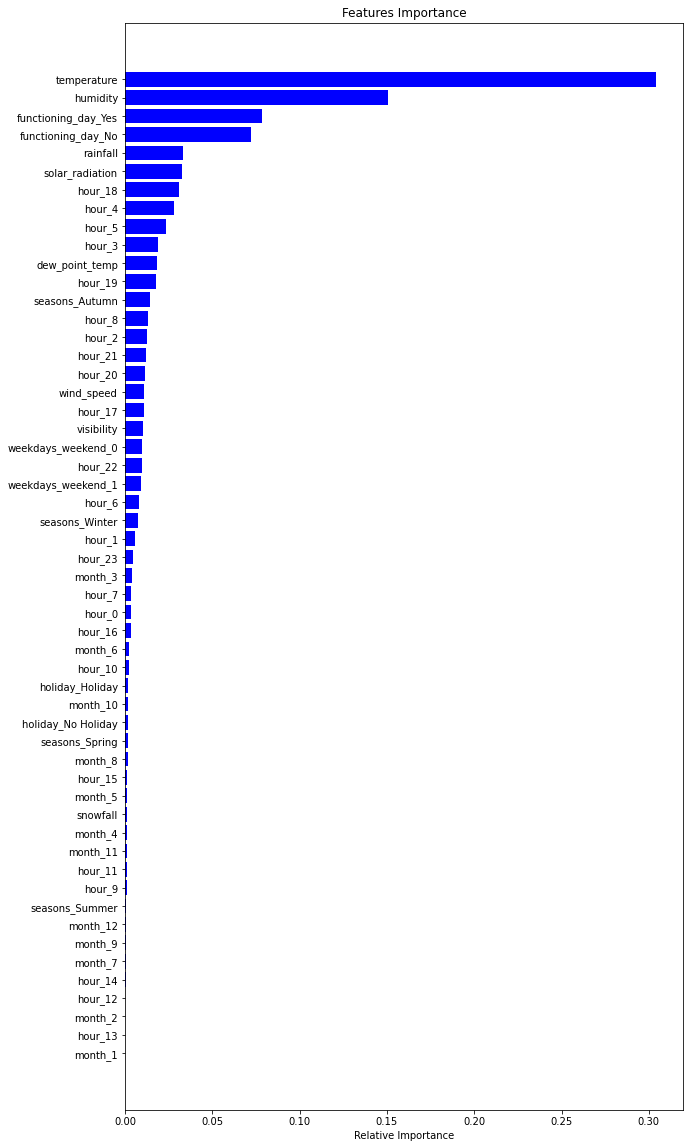

In [697]:
# Plotting figure
plt.figure(figsize=(10,20))
features = X_train.columns
indices = np.argsort(importances)
plt.title('Features Importance')
plt.barh(range(len(indices)),importances[indices],color='blue',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#**Overall Conclusion**
I initially did observed all the important features of dataset and preprocessed it. Once preprocessing was completed by me EDA was initiated. At first I analysed the dependent variable **'Rented Bike Count'** and also transformed it. After completing EDA on all the numerical features, I analysed the target variable with respect to categorical features. While analysing the categorical variable, I dropped the variable which had majority of one class. I also found out the correlation,distribution and their relationship with dependent variable. I also removed some numerical features which had mostly 0 values, so it would not affect the final result and hot encoded the categorical variable.


*   Machine learning algorithm which is implemented are:


1.   Linear Regression
2.   Elastic Net Regression

1.   Lasso Regreesion
2.   Ridge Regression

1.   Decision Trees Regression
2.   Random Forest Regression

Hyperparameter tuning is also done to improve our model performance. The comparisons of our results are:










In [726]:
# Comparing evaluated metrics values of all the models
overall_result = pd.concat([train_df,test_df],keys=['Training set','Test set'])
overall_result 

Model    MSE   MAE  RMSE    R2  Adjusted R2
Training set 0         Linear regression  34.81  4.44  5.90  0.77         0.77
             1    Elastic net regression  52.82  5.58  7.27  0.66         0.65
             2          Lasso regression  91.46  7.24  7.32  0.41         0.39
             3          Ridge regression  34.81  4.44  5.90  0.77         0.77
             4  Decision tree regression  49.48  5.24  7.03  0.68         0.67
             5  Random forest regression   1.58  0.80  1.26  0.99         0.99
Test set     0         Linear regression  33.09  4.37  5.75  0.79         0.79
             1    Elastic net regression  53.61  5.63  7.32  0.66         0.65
             2          Lasso regression  96.69  7.44  9.83  0.39         0.37
             3          Ridge regression  33.09  4.37  5.75  0.79         0.79
             4  Decision tree regression  58.95  5.65  7.68  0.63         0.62
             5  Random forest regression  12.58  2.20  3.55  0.92         0.92



*   Overfitting is not seen.
*   Random forest regression gives the highest R2 score. On training set the r2 score is 99% and 92% on test set.

However, this data is time dependent, the values of variables like temperature,  windspeed, solar radiation etc., will not be always consistent. Hence, there might be scenario model won't perform well. But we can deploy this model,as Machine learning is an evolving field and we need to keep checking our model from time to time. 
